In [23]:
import pandas as pd
import numpy as np
import ast
from sklearn.linear_model import LinearRegression
from itertools import product
import pickle

df_metric = pd.read_csv('../metrics_fit.csv')
metrics = []
metrics.append(ast.literal_eval(df_metric['metric'][0]))
data = np.array(metrics).flatten()


metric_dict = {}
round_metrics_dict = {}
index = 0
for (agent_num, agent_size, agent_vel) in product(range(10, 30, 2), np.arange(0.5, 1.5, 0.1), np.arange(2, 6, 0.5)):
    metric_dict[(agent_num, agent_size, agent_vel)] = data[index]
    index += 1

min_metric = min(metric_dict.values())
max_metric = max(metric_dict.values())
for key in metric_dict.keys():
    metric_dict[key] = 10 - 10 * (metric_dict[key] - min_metric) / (max_metric - min_metric)

# Preparing the data for the model
X = np.array(list(metric_dict.keys()))  # Feature vectors
y = np.array(list(metric_dict.values()))  # Target values

# Creating the linear regression model and fitting the data
reg = LinearRegression().fit(X, y)

# Printing out the coefficients and the intercept
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

filename = 'fit_model.sav'
pickle.dump(reg, open(filename, 'wb'))

Coefficients: [0.22616079 2.64576023 1.1043515 ]
Intercept: -6.013725768018528


Mean squared error: 0.21
Variance score: 0.95


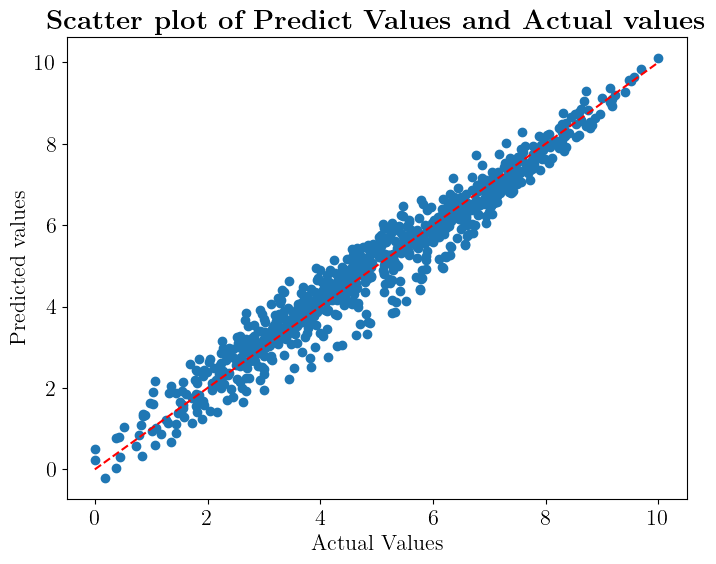

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib as mpl
import matplotlib.pyplot as plt

y_pred = reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print('Variance score: %.2f' % r2_score(y, y_pred))

# 1. Actual vs. Predicted
y_pred = reg.predict(X)
plt.figure(figsize=(8, 6))
plt.rc('font', family='serif')
plt.rc('text', usetex=True)
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice)
mpl.rc('text', usetex=True)
# Define the font size
mpl.rc('font', size=18)  # controls default text sizes
mpl.rc('axes', titlesize=20)  # fontsize of the axes title
mpl.rc('axes', labelsize=18)  # fontsize of the x and y labels
mpl.rc('xtick', labelsize=16)  # fontsize of the tick labels
mpl.rc('ytick', labelsize=16)  # fontsize of the tick labels
mpl.rc('legend', fontsize=16)  # legend fontsize
mpl.rc('figure', titlesize=3)  # fontsize of the figure title
plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], '--', color='red') # identity line
plt.xlabel("Actual Values", fontsize=16)
plt.ylabel("Predicted values", fontsize=16)
plt.title(r"\textbf{Scatter plot of Predict Values and Actual values}", fontsize=20)
plt.savefig("actual_vs_predicted.pdf", bbox_inches='tight')
plt.show()